In [8]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-01 13:29:11,937: Credentials are already in use. The existing account in the session will be replaced.


# Szuperpozíció

Klasszikusan a bit értéke vagy 0, vagy 1

Kvantumosan szuperpozíció is lehet

|$\psi$> = $\alpha$|0> + $\beta$|1> : az egyik ágban 0, a másikban 1 a bit értéke

mérési valószínűségek: $\alpha^2$ és $\beta^2$

# Klónozás

Veszünk két qubitet, az egyik kvantumállapota |$\psi$>, a másiké pedig $|0>$

Klónozás alatt azt értjük, hogy a másik qubitet megváltoztatjuk úgy, hogy az ő állapota is |$\psi$> legyen

Klasszikusan lehet klónozni, szuperponált kvantumállapotot viszont NEM!

# Példa: két azonos állapotú qubit vs CNOT

A példában az alábbi kapukat fogjuk felhasználni:
* Hadamard (H) - egyqubites kapu: a 0 és az 1 egyenlő arányú szuperpozícióját hozza létre

$H|0> = \frac{1}{\sqrt{2}}$|0> + \frac{1}{\sqrt{2}}$|1>

$H|1> = \frac{1}{\sqrt{2}}$|0> - \frac{1}{\sqrt{2}}$|1>

* CNOT - kétqubites kapu: Ha a kontroll (első) qubit értéke 1, NOT kapuként hat a target (második) qubitre

CNOT|00> = |00>

CNOT|01> = |01>

CNOT|10> = |11>

CNOT|11> = |10>

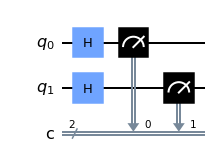

In [3]:
circ_clones = QuantumCircuit(2, 2)
circ_clones.h(0)
circ_clones.h(1)
circ_clones.measure([0, 1], [0, 1])
circ_clones.draw()
# ez a két qubit egymás klónja

In [4]:
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

In [5]:
job = backend.run(circ_clones, shots=1024)
job.result().get_counts()

{'01': 232, '00': 263, '10': 268, '11': 261}

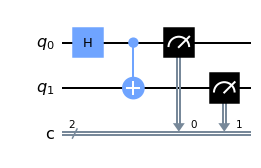

In [9]:
circ_cnot = QuantumCircuit(2, 2)
circ_cnot.h(0)
circ_cnot.cx(0, 1)
circ_cnot.measure([0, 1], [0, 1])
circ_cnot.draw()

Nem klónok, mert csak 00 és 11 lehet az eredmény!

In [10]:
job = backend.run(circ_cnot, shots=1024)
job.result().get_counts()

{'00': 537, '11': 487}